<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Yasaei</h4>
<h4 align="center">Sharif University of Technology, Autumn 2024</h4>

**Student Name**: Adel Movahedian

**Student ID**: 400102074

#Implementing PCA from Scratch and Using it with K-Means

## Introduction and Purpose

In this exercise, you will:

1. **Implement Principal Component Analysis (PCA) from scratch** using NumPy (without relying on `sklearn.decomposition.PCA`).
2. Apply your custom PCA to a dataset to reduce its dimensionality.
3. Run **K-Means clustering** on both the original data and the PCA-reduced data.
4. Compare the clustering results and visualize them.

**Principal Component Analysis (PCA)** is a dimensionality reduction technique that finds linear combinations of features (principal components) that explain the most variance in the data. By implementing it yourself, you will gain a deeper understanding of the underlying math (e.g., covariance matrix, eigenvalues, eigenvectors).

After reducing the data dimensions with your custom PCA, you will run K-Means clustering and evaluate whether PCA helps or hinders the clustering performance.



## Part 1: Data Loading and Exploration

**Tasks:**  
- Load the Iris dataset using `sklearn.datasets.load_iris`.
- Print the shape of `X` and a few samples to understand the data.

**Question:** The Iris dataset has 4 features and 3 classes. Without looking at the labels, do you expect PCA to help cluster the data better in fewer dimensions?

asnwer:
<font color='green'>
Yes, PCA is expected to help cluster the data better in fewer dimensions. The Iris dataset has 4 features, but not all of them may be equally important for distinguishing between the classes. PCA reduces the dimensionality by identifying the directions (principal components) that explain the most variance in the data. By projecting the data onto the top two or three principal components, we can simplify the data while retaining most of its structure. This can make patterns more apparent and improve clustering, especially if noise or redundant features are present.</font>


In [1]:
# TODO: Load Iris dataset and print basic info
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target
print("Shape of X:", X.shape)
print("First 5 rows:\n", X[:5])

Shape of X: (150, 4)
First 5 rows:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## Part 2: Data Preprocessing (Scaling)

PCA and K-Means are sensitive to feature scales. Standardize the data before applying PCA.

**Tasks:**  
- Scale the data using StandardScaler.
- Print the mean and variance of the scaled data to confirm.

**Hint:** Use `StandardScaler` from `sklearn.preprocessing`.


In [2]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Mean after scaling:", X_scaled.mean(axis=0))
print("Std after scaling:", X_scaled.std(axis=0))


Mean after scaling: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Std after scaling: [1. 1. 1. 1.]


## Part 3: Implementing PCA from Scratch

We will:
1. Compute the covariance matrix of the scaled data.
2. Find its eigenvalues and eigenvectors.
3. Sort eigenvectors by their eigenvalues in descending order.
4. Select the top `n_components` principal components.
5. Project the data onto these principal components.

**Tasks:**
Implement a `my_pca(X, n_components)` function that:
 - Computes the covariance matrix.
 - Performs eigen decomposition.
 - Sorts eigenvectors by eigenvalues.
 - Returns the projected data and the selected eigenvectors, as well as explained variance ratio.

**Question:** Why do we pick the eigenvectors with the largest eigenvalues as the principal components?

answer:
<font color='green'>We pick the eigenvectors with the largest eigenvalues as the principal components because eigenvalues represent the amount of variance in the data explained by their corresponding eigenvectors. Eigenvectors with larger eigenvalues capture the most significant patterns or directions of variance in the dataset. By selecting these eigenvectors, we retain the most information about the data while reducing its dimensionality. This ensures that the reduced representation of the data preserves its essential structure and variability.</font>

In [3]:
# TODO: Implement PCA from scratch

def my_pca(X, n_components=2):
    # Step 1: Compute covariance matrix: shape (D, D)
    cov_matrix = np.cov(X, rowvar=False)

    # Step 2: Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Step 3: Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Step 4: Select top n_components
    selected_eigenvectors = eigenvectors[:, :n_components]
    selected_eigenvalues = eigenvalues[:n_components]

    # Step 5: Project data: Z = X * selected_eigenvectors
    Z = X @ selected_eigenvectors

    # Compute explained variance ratio
    explained_variance_ratio = selected_eigenvalues / np.sum(eigenvalues)

    # return Z, selected_eigenvectors, explained_variance_ratio
    return Z, selected_eigenvectors, explained_variance_ratio

# Test your my_pca function
Z, eigvecs, exp_var_ratio = my_pca(X_scaled, n_components=2)
print("Shape of projected data:", Z.shape)
print("Explained variance ratio:", exp_var_ratio)


Shape of projected data: (150, 2)
Explained variance ratio: [0.72962445 0.22850762]


## Part 4: Comparing K-Means Clustering Before and After PCA

We will:
1. Run K-Means clustering on the original scaled data.
2. Run K-Means clustering on the PCA-reduced data (from `my_pca`).

**Tasks:**  
- Perform K-Means with `k=3` (since Iris has 3 classes).
- Extract cluster labels from both runs.

**Hint:** Use `KMeans` from `sklearn.cluster`.

**Question:** Do you think clustering on just the first two principal components will yield a similar or better ARI score than using all features?

answer:
<font color='green'>Clustering on the first two principal components is likely to yield a similar or potentially better ARI score than using all features. The PCA-reduced data retains the most significant patterns of variance while removing noise and redundant information present in the original features. This can make clustering algorithms, like K-Means, more effective as they focus on the most meaningful dimensions. However, the actual outcome depends on how well the first two principal components separate the classes in the dataset. For the Iris dataset, PCA often highlights class separability, leading to comparable or improved clustering performance.</font>

In [4]:
# TODO: K-Means on original scaled data
from sklearn.cluster import KMeans

kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_original.fit(X_scaled)
labels_original = kmeans_original.labels_

# TODO: K-Means on PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(Z)
labels_pca = kmeans_pca.labels_
print("Cluster labels (original scaled data):", labels_original)
print("Cluster labels (PCA-reduced data):", labels_pca)


Cluster labels (original scaled data): [1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Cluster labels (PCA-reduced data): [1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


## Part 5: Evaluating the Clusters

Use Adjusted Rand Index (ARI) to see how well clusters align with the true labels.

**Tasks:**  
- Compute ARI for both sets of labels against `y`.
- Print and compare.

**Hint:** `from sklearn.metrics import adjusted_rand_score`.


In [5]:
# TODO: Compute ARI scores
from sklearn.metrics import adjusted_rand_score

ari_original = adjusted_rand_score(y, labels_original)
ari_pca = adjusted_rand_score(y, labels_pca)
print("ARI (Original Scaled Data):", ari_original)
print("ARI (PCA-Reduced Data):", ari_pca)


ARI (Original Scaled Data): 0.432804702527474
ARI (PCA-Reduced Data): 0.432804702527474


## Part 6: Visualizing the PCA Results

Visualize the PCA-reduced data and the clusters.

**Tasks:**  
- Plot `Z[:,0]` vs `Z[:,1]` and color by `labels_pca`.
- (Optional) Also plot true labels to compare how well the clusters match.

**Hint:** Use `matplotlib.pyplot.scatter`.


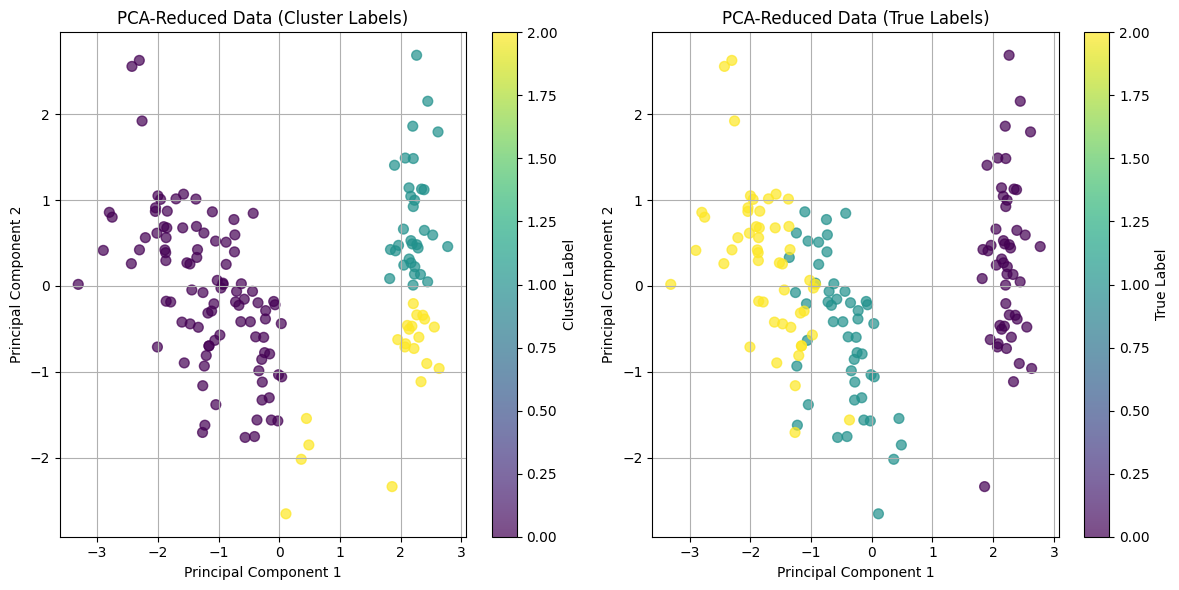

In [7]:
# TODO: Visualize PCA results
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Z[:, 0], Z[:, 1], c=labels_pca, cmap='viridis', s=50, alpha=0.7)
plt.title("PCA-Reduced Data (Cluster Labels)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.subplot(1, 2, 2)
plt.scatter(Z[:, 0], Z[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title("PCA-Reduced Data (True Labels)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="True Label")
plt.grid(True)
plt.tight_layout()
plt.show()


<font color="green">The left plot shows data grouped by cluster labels from an unsupervised algorithm, while the right plot shows data grouped by true labels. Both plots display three groups with some level of separation, but the clusters in the left plot exhibit more overlap, particularly between purple and teal groups, compared to the clearer separation in the true labels. While there is partial alignment between clusters and true labels (the isolated yellow group), the clustering algorithm misclassifies boundary points and struggles with overlapping regions, indicating it does not fully capture the true data structure. Quantitative evaluation and further tuning could improve clustering performance.</font>